# Diagrama de bifurcación y coeficientes de Lyapunov

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math

dk = 10 ** (-3)
ks = np.arange(1, 4, dk)
ptos = 50
N = 1000 # Para el cálculo de los exponentes de Lyapunov.

![image.png](imgs/ec2.png)

k−2kN_n

In [55]:
def F_prima(k, N_n):
	return (k-2*k*N_n)

In [56]:
def lyapunov(k, N, derivadas):
	suma = 0
	for n in range(N):
		if abs(derivadas[n]) != 0:
			logaritmo = math.log(abs(derivadas[n])) 
			suma += logaritmo

	return suma / N


In [57]:
def Fk(N_n, k):
	return k * N_n * (1-N_n)

In [60]:
N_graf = []
k_graf = []
lyapunovs = []
for k in ks:
	for i in range(ptos):
		N_n = 0.25
		Ns = [N_n]
		for i in range(1, N):
			N_n = Fk(N_n, k)
			Ns.append(N_n)
		# N_graf.append(N_n)
		N_graf.append(Ns[-20:])
		# k_graf.append(k)
		k_graf.append([k for i in range(20)])
	
	derivadas = [F_prima(k, i) for i in Ns]
	lyapunovs.append(lyapunov(k, N, derivadas))

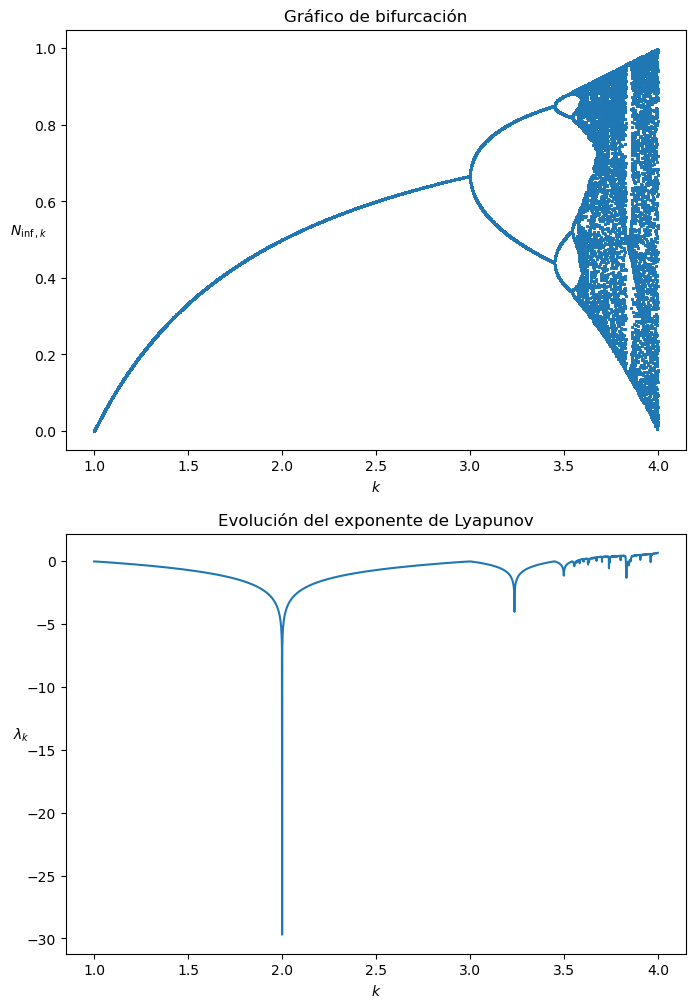

In [61]:
plt.figure(figsize=(8, 12))

plt.subplot(211)
plt.title("Gráfico de bifurcación")
plt.xlabel(r"$k$")
plt.ylabel(r"$N_{\inf , k}$", rotation=0)
plt.scatter(k_graf, N_graf, marker="o", s=0.1)

plt.subplot(212)
plt.title("Evolución del exponente de Lyapunov")
plt.xlabel(r"$k$")
plt.ylabel(r"$\lambda _{k}$", rotation=0)
plt.plot(ks, lyapunovs)

plt.show()

# Firma del caos

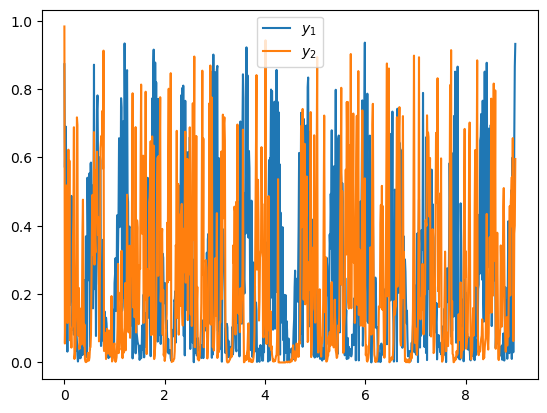

In [73]:
y1 = np.loadtxt("y1y2/y1.txt")
y2 = np.loadtxt("y1y2/y2.txt")

t = [0.01 * i for i in range(len(y1))]

plt.plot(t, y1, label=r"$y_1$")
plt.plot(t, y2, label=r"$y_2$")
plt.legend()
plt.show()

In [74]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size//2:]

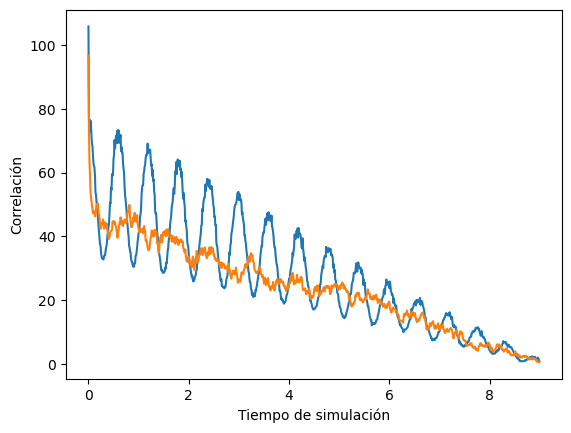

In [79]:
autocor_y1 = autocorr(y1)
autocor_y2 = autocorr(y2)

plt.ylabel("Correlación")
plt.xlabel("Tiempo de simulación")
plt.plot(t, autocor_y1)
plt.plot(t, autocor_y2)

plt.show()

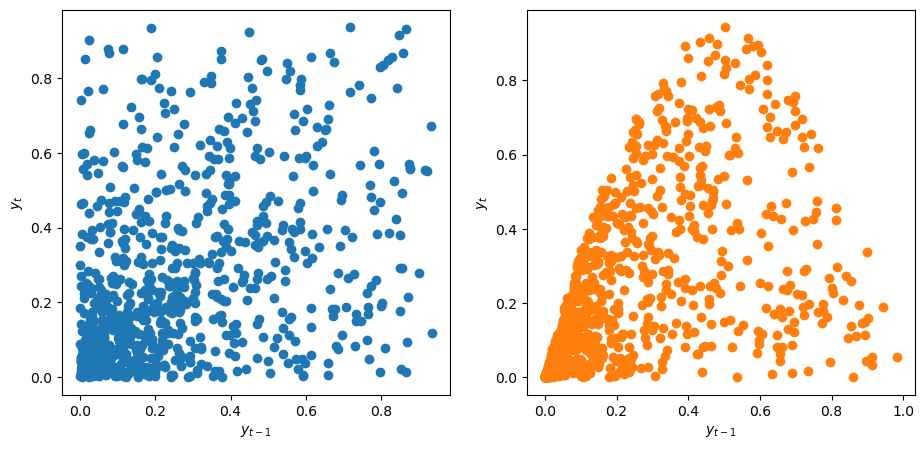

In [94]:
plt.figure(figsize=(11, 5))
plt.subplot(121)

plt.xlabel(r"$y_{t-1}$")
plt.ylabel(r"$y_{t}$")
plt.scatter(y1[:-1], y1[1:])

plt.subplot(122)
plt.xlabel(r"$y_{t-1}$")
plt.ylabel(r"$y_{t}$")
plt.scatter(y2[:-1], y2[1:], color="C1")

plt.show()